# Porosity-depth relationship

<div class="alert alert-block alert-success">
_Learning points_: compaction and porosity loss during burial requires some understanding of how porosity can be estimated in the subsurface. Using porosity data, we will evaluate the evolution of porosity with depth and variation in porosity trends between different lithologies.
</div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

Porosity decreases with depth, initially largely due to mechanical compaction of the sediment. The decrease in porosity is relatively large close to the seafloor, where sediment is loosely packed; the lower the porosity, the less room there is for further compaction. This decrease in porosity with depth is commonly modeled as a negative exponential function (Athy, 1930):

$$ \phi(y) = \phi_0 e^{-y/y_0}$$

where $\phi(y)$ is the porosity at depth $y$ and $y_0$ is the depth where the initial porosity $\phi_0$ was reduced by $1/e$

In [6]:
import numpy as np

print 1./np.exp(1.)*0.5

0.183939720586


This is an empirical equation, as there is no direct physical link between depth and porosity; compaction and porosity reduction are more directly related to the increase in effective stress under a thicker overburden. Here we only address the simplest scenario with no overpressured zones. For normally pressured sediments, Athy’s porosity-depth relationship can be expressed in a slightly different form:

$$ \phi(y) = \phi_0 e^{-cy}$$

where $c$ is a coefficient with the units $km^{-1}$. 

<div class="alert alert-block alert-info">
**Considering the exponential porosity-depth curve below, find the value of the coefficient $c$**</div>

<img src="figs/ex2-fig1.png" width="30%">

To help you, here is how to call the exponential function from the **numpy library**.

```python
import numpy as np
e1 = np.exp(1.)
print e1
```

In [10]:
phi0 = 0.5
phi_c = 0.5/np.exp(1.)
print phi_c

0.183939720586


Reading from the graph, it means that depth is around $\sim$2.2 km for a porosity of $\sim$0.18. We deduce the value of the porosity-depth coefficient $c$:

In [13]:
c = 1./2.2
print 'Approximated porosity-depth coefficient c [km-1] value:',c

Approximated porosity-depth coefficient c [km-1] value: 0.454545454545


## Lithology dependent curves

The idea is that $c$ is a characteristic constant for a certain lithology and it can measured if porosity values are available from different depths. Muds have higher porosities at the seafloor than sands but they compact faster than sands.

Below is a graph showing depth-porosity curves from a compilation of 11 Ocean Drilling Program legs and 53 sites (Kominz et al., 2011)

<img src="figs/ex2-fig2.png" width="90%">



<img src="figs/ex2-fig3.png" width="60%">

Above table shows exponential fits to data from the Ocean Drilling Program (Kominz et al., 2011 - Table 3).

We will compare it with the values from Sclater & Christie (1980) given in the lecture notes.

<img src="figs/ex2-fig4.png" width="70%">


<div class="alert alert-block alert-info">
**Using the exemple provided for the Sclater & Christie dataset, plot the curves derived by Kominz for the ODP data set.**</div>

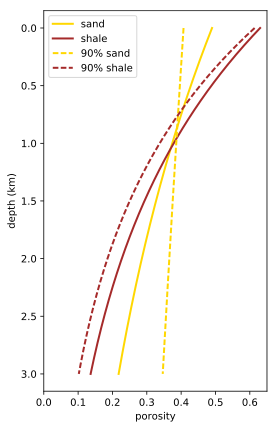

In [25]:
#################################################
# Sclater & Christie (1980)
#################################################
# Porosity-depth coefficient for sand (km-1)
c_sand = 0.27 
# Porosity-depth coefficent for shale (km-1)
c_shale = 0.51 
# Surface porosity for sand
phi_sand_0 = 0.49 
# Surface porosity for shale
phi_shale_0 = 0.63 

# Define depth range from 0 to 3 km depth
y = np.arange(0,3.01,0.01)

# Define Athy’s porosity-depth relationships 
phi_sand = phi_sand_0 * np.exp(-c_sand*y)
phi_shale = phi_shale_0 * np.exp(-c_shale*y)
 
#################################################
# Kominz et al. (2011)
#################################################
# Kominz et al. 2011 >90% sand curve 
ck_sand = 1000/18605.0 
# Kominz et al. 2011 >90% mud curve (conversion from m to km)
ck_shale = 1000/1671.0 
# Kominz et al. 2011 >90% sand curve
phik_sand_0 = 0.407 
# Kominz et al. 2011 >90% shale curve
phik_shale_0 = 0.614 

# Define Athy’s porosity-depth relationships
phik_sand = phik_sand_0 * np.exp(-ck_sand*y)
phik_shale = phik_shale_0 * np.exp(-ck_shale*y)

plt.figure(figsize=(4,7))
plt.plot(phi_sand,y,'gold',linewidth=2,label='sand')
plt.plot(phi_shale,y,'brown',linewidth=2,label='shale')
plt.xlabel('porosity')
plt.ylabel('depth (km)')
plt.xlim(0,0.65)
plt.gca().invert_yaxis()

plt.plot(phik_sand,y,'--',color='gold',linewidth=2,label='90% sand')
plt.plot(phik_shale,y,'--',color='brown',linewidth=2,label='90% shale')

plt.legend(loc=0, fontsize=10)

While the compaction trends for shale happen to be fairly similar in the plot above, the ones for sandy lithologies are very different. 

**This highlights that porosity-depth curves vary significantly from one basin to another, and are strongly affected by overpressures and exhumation.** 

Using local data and geological information is critical. As Giles et al. (1998) have put it, “_The use of default compaction curves can introduce significant errors into thermal history and pore- fluid pressure calculations, particularly where little well data are available to calibrate the model._” 

To see how widely – and wildly – variable compaction trends can be, check out the review paper by Giles et al. (1998).

Giles, M.R., Indrelid, S.L., and James, D.M.D., 1998, [Compaction — the great unknown in basin modelling: Geological Society London Special Publications](http://sp.lyellcollection.org/content/141/1/15), v. 141, no. 1, p. 15–43, doi: 10.1144/gsl.sp.1998.141.01.02.

Kominz, M.A., Patterson, K., and Odette, D., 2011, [Lithology Dependence of Porosity In Slope and Deep Marine Sediments: Journal of Sedimentary Research](http://jsedres.geoscienceworld.org/content/81/10/730), v. 81, no. 10, p. 730–742, doi: 10.2110/jsr.2011.60.